## Plotting Gyro relations

I'm going to quickly overplot the Gyrochronology relations (not considering critical Rossby Number cutoff) presented in Angus et al. 2015.

These are those reported in Barnes (2007), Mamajek & Hillenbrand (2008) and Angus et al (2015).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('colorblind')
import mystyle
plt.style.use(mystyle.ms)

ati = pd.read_csv('../../data/atium.csv',index_col=0)

#Exclude those stars with a Rhat > 1.1 flag and no results otherwise
ati = ati[np.isfinite(ati.nus.values)]
ati = ati[ati.flag != 'rhat_1' ]
print('We have {} stars'.format(len(ati)))

We have 78 stars


$P = \tau^n \times a(B - V - c)^b$

where $P$ is rotation in days
$\tau$ is age (in Myr),
B-V are colour in magnitude,
the rest are free parameters


In [22]:
barnes = [0.7725, 0.601, 0.4, 0.5189]
mamajek = [0.409, 0.325, 0.495, 0.566]
angus = [0.40, 0.31, 0.45, 0.55]

sun = {'age': 4.603,
       'P' : 24,
       'M' : 1,
       'R' : 1}

In [3]:
def gyro(tau, bv, a, b, c, n):
    return tau*1000**n * a*(bv - c)**b

/usr/lib/python3/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


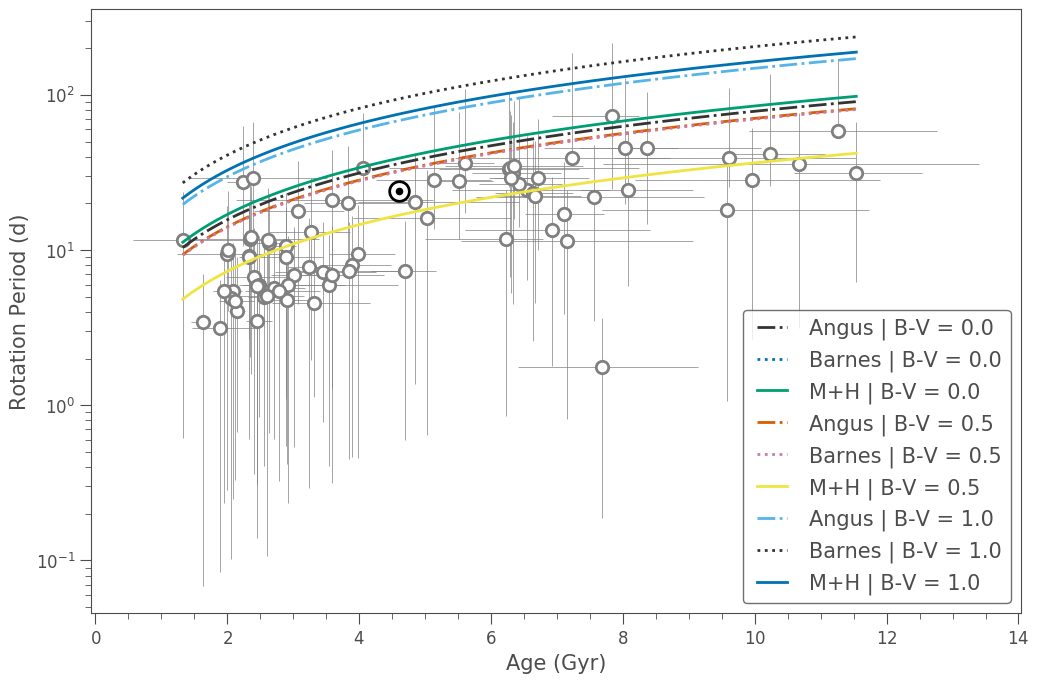

In [17]:
with plt.style.context(mystyle.ms):
    fig, ax = plt.subplots(figsize=(12,8))
    c = ax.scatter(ati.age, ati.P, lw=2, ec='grey', c='white',s=80, zorder=2)
    plt.errorbar(ati.age, ati.P, xerr=[ati.loage, ati.upage], yerr=[ati.l_P, ati.u_P],
                fmt='|', zorder=1, color='grey')


    tau = np.linspace(ati.age.min(), ati.age.max(), 100)
    for bv in [0.0, 0.5, 1.0]:
        plt.plot(tau, gyro(tau, bv, *angus), lw=2, ls='-.', label='Angus | B-V = {}'.format(bv))
        plt.plot(tau, gyro(tau, bv, *barnes), lw=2, ls=':', label='Barnes | B-V = {}'.format(bv))
        plt.plot(tau, gyro(tau, bv, *mamajek), lw=2, ls='-', label='M+H | B-V = {}'.format(bv))

    plt.scatter(sun['age'],sun['P'], s=200, c='white', ec='k',lw=2)
    plt.scatter(sun['age'],sun['P'], s=20, c='k')

    ax.set_axisbelow(True)
    ax.set_xlabel('Age (Gyr)')
    ax.set_ylabel('Rotation Period (d)')
    ax.set_yscale('log')
    ax.legend(loc='lower right',fontsize=15)
    # fig.colorbar(c,label=r'$BP-RP$')
    plt.show()



## Lets make another plot showing where the hypothetical Rossby cutoff would be

$R_{\rm o, crit} = 2.16 \pm 0.09$

$P_{\rm crit} = R_{\rm o, crit} \times \tau_{\rm cv}$, where

$\log(\tau_{\rm cv}) = 1.16 - 1.49\log(M / M_{\odot}) - 0.54\log(M / M_{\odot})^2$

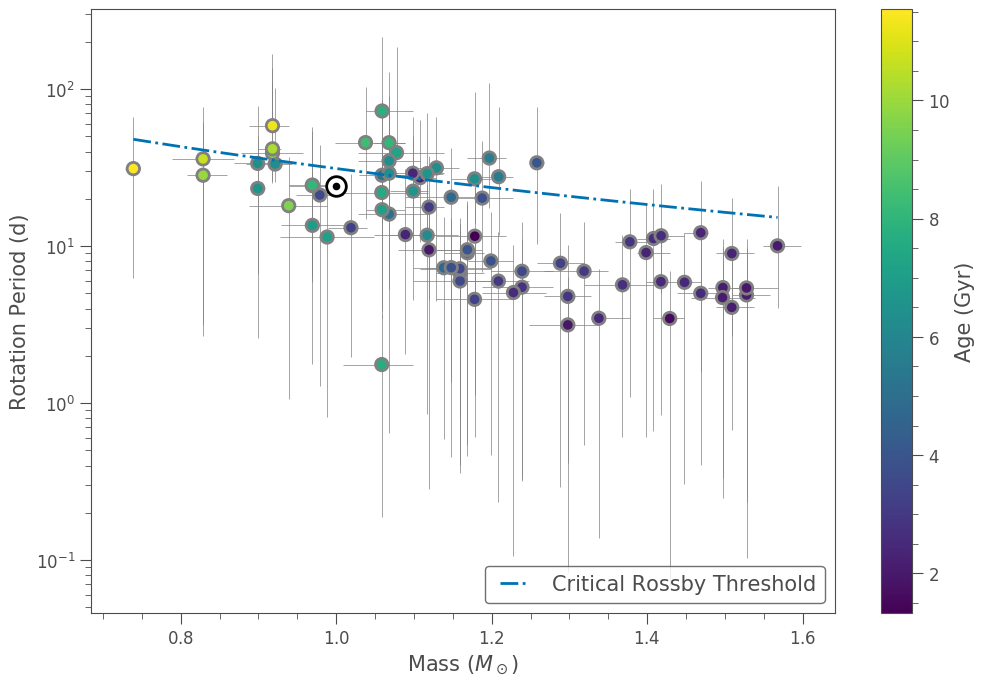

In [40]:
M = np.linspace(ati.modmass.min(), ati.modmass.max(), 100)
tcv = 10**(1.16 - 1.49*np.log10(M) - 0.54*np.log10(M)**2)
Pcrit = 2.16 * tcv

with plt.style.context(mystyle.ms):
    fig, ax = plt.subplots(figsize=(12,8))
    c = ax.scatter(ati.modmass, ati.P, lw=2, ec='grey', c=ati.age,s=80, zorder=2)
    plt.errorbar(ati.modmass, ati.P, xerr=[ati.lomodmass, ati.upmodmass], yerr=[ati.l_P, ati.u_P],
                fmt='|', zorder=1, color='grey')

    plt.plot(np.nan, np.nan)
    plt.plot(M, Pcrit, lw=2, ls='-.', label='Critical Rossby Threshold')
    
    plt.scatter(sun['M'],sun['P'], s=200, c='white', ec='k',lw=2)
    plt.scatter(sun['M'],sun['P'], s=20, c='k')

    ax.set_axisbelow(True)
    ax.set_xlabel(r'Mass ($M_\odot$)')
    ax.set_ylabel('Rotation Period (d)')
    ax.set_yscale('log')
    fig.colorbar(c, label='Age (Gyr)')
    ax.legend(loc='lower right',fontsize=15)
    plt.show()

#### If this really was a critical threshold after which period no longer increased we would see flatlines branching off from this relation, which we don't